In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [76]:
train=pd.read_csv('../input/train_data.csv')
print(train.shape)
train = train.query("tradeMoney<70000")
print(train.shape)

(41440, 51)
(41402, 51)


## 异常值检测
利用箱型图的四分位距（IQR）对异常值进行检测，也叫Tukey‘s test。箱型图的定义如下：

![](https://user-gold-cdn.xitu.io/2018/8/8/1651720269417d3a?imageView2/0/w/1280/h/960/format/webp/ignore-error/1)

四分位距(IQR)就是上四分位与下四分位的差值。而我们通过IQR的1.5倍为标准，规定：超过上四分位+1.5倍IQR距离，或者下四分位-1.5倍IQR距离的点为异常值。下面是Python中的代码实现，主要使用了numpy的percentile方法。

```
Percentile = np.percentile(df['length'],[0,25,50,75,100])
IQR = Percentile[3] - Percentile[1]
UpLimit = Percentile[3]+ageIQR*1.5
DownLimit = Percentile[1]-ageIQR*1.5
```

也可以使用seaborn的可视化方法boxplot来实现：

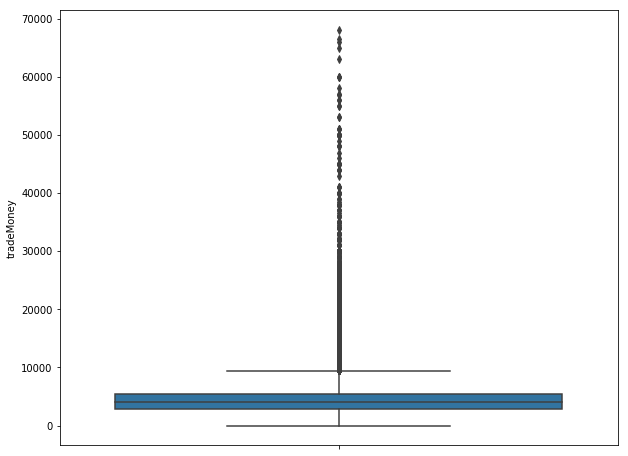

In [77]:
f,ax=plt.subplots(figsize=(10,8))
sns.boxplot(y='tradeMoney',data=train,ax=ax)
plt.show()

In [78]:
# 数值型数据
numerical_feas=['area','totalFloor','saleSecHouseNum','subwayStationNum',
    'busStationNum','interSchoolNum','schoolNum','privateSchoolNum','hospitalNum',
    'drugStoreNum','gymNum','bankNum','shopNum','parkNum','mallNum','superMarketNum',
    'totalTradeMoney','totalTradeArea','tradeMeanPrice','tradeSecNum','totalNewTradeMoney',
    'totalNewTradeArea','tradeNewMeanPrice','tradeNewNum','remainNewNum','supplyNewNum',
    'supplyLandNum','supplyLandArea','tradeLandNum','tradeLandArea','landTotalPrice',
    'landMeanPrice','totalWorkers','newWorkers','residentPopulation','pv','uv','lookNum']

In [90]:
Percentile = np.percentile(train['saleSecHouseNum'],[0,0.1,50,75,99.99])
print(Percentile)
tradeMoneyIQR = Percentile[3] - Percentile[1]
UpLimit = Percentile[3]+tradeMoneyIQR*1.5
DownLimit = Percentile[1]-tradeMoneyIQR*1.5
print(UpLimit,DownLimit)

[ 0.  0.  0.  1. 38.]
2.5 -1.5
